# IMC Kidney Injury Analysis - Publication Figures

Spatial proteomics analysis of cross-sectional kidney injury model using Imaging Mass Cytometry.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
from pathlib import Path
import json
from typing import Dict, List, Tuple, Optional
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path for imports
import sys
sys.path.append('..')

# Import our comprehensive figure generator
from src.viz_utils.comprehensive_figures import ComprehensiveFigureGenerator

# Helper functions for visualization
def create_figure_grid(fig_width=20, fig_height=16):
    """Create consistent figure grid for publication."""
    fig = plt.figure(figsize=(fig_width, fig_height))
    return fig

print("Imports loaded successfully")
print("Ready to generate comprehensive IMC figures using ALL 25 ROIs")

Imports loaded successfully
Ready to generate comprehensive IMC figures using ALL 25 ROIs


In [2]:
# Load configuration and data
import sys
sys.path.append('..')

from src.utils.streamlined_loader import StreamlinedIMCLoader

# Load config
with open('../config.json', 'r') as f:
    config = json.load(f)

# Initialize loader
loader = StreamlinedIMCLoader(config)

# Get data
metadata_df = loader.metadata_df
expression_df = loader.expression_df
quality_df = loader.quality_df
protein_channels = loader.protein_channels

print(f"Loaded {len(metadata_df)} ROIs")
print(f"Protein channels: {protein_channels}")
print(f"Conditions: {metadata_df['condition'].unique()}")
print(f"Timepoints: {sorted(metadata_df['timepoint'].unique())}")
print(f"Regions: {metadata_df['region'].unique()}")

Loaded 25 ROIs
Protein channels: ['CD45', 'CD11b', 'Ly6G', 'CD140a', 'CD140b', 'CD31', 'CD34', 'CD206', 'CD44']
Conditions: ['Sham' 'Injury' 'Test']
Timepoints: [np.int64(0), np.int64(1), np.int64(3), np.int64(7)]
Regions: ['Cortex' 'Medulla']


In [3]:
# New comprehensive figures using ALL 25 ROIs
from src.viz_utils.comprehensive_figures import ComprehensiveFigureGenerator

# Initialize with our results directory
results_dir = '../results/cross_sectional_kidney_injury/roi_results'
fig_gen = ComprehensiveFigureGenerator(results_dir)

print("Loaded comprehensive figure generator")
print(f"Total ROIs: {len(fig_gen.roi_data)}")
print(f"Clusters identified: {len(fig_gen.cluster_phenotypes)}")
print("\nCluster phenotypes:")
for cluster_id, name in fig_gen.cluster_phenotypes.items():
    print(f"  Cluster {cluster_id}: {name}")

Experimental Design:
  Injury_D1_Cortex: 3 ROIs
  Injury_D1_Medulla: 3 ROIs
  Injury_D3_Cortex: 3 ROIs
  Injury_D3_Medulla: 3 ROIs
  Injury_D7_Cortex: 3 ROIs
  Injury_D7_Medulla: 3 ROIs
  Sham_D0_Cortex: 3 ROIs
  Sham_D0_Medulla: 3 ROIs
  Test_D7_Cortex: 1 ROIs
Loaded comprehensive figure generator
Total ROIs: 25
Clusters identified: 8

Cluster phenotypes:
  Cluster 0: CD31+ Endothelial
  Cluster 1: Ly6G+ Cells
  Cluster 2: CD11b+ Cells
  Cluster 3: CD44+ Activated/Stem
  Cluster 4: CD11b+ Cells
  Cluster 5: CD45+ Leukocytes
  Cluster 6: CD44+ Activated/Stem
  Cluster 7: Ly6G+ Cells


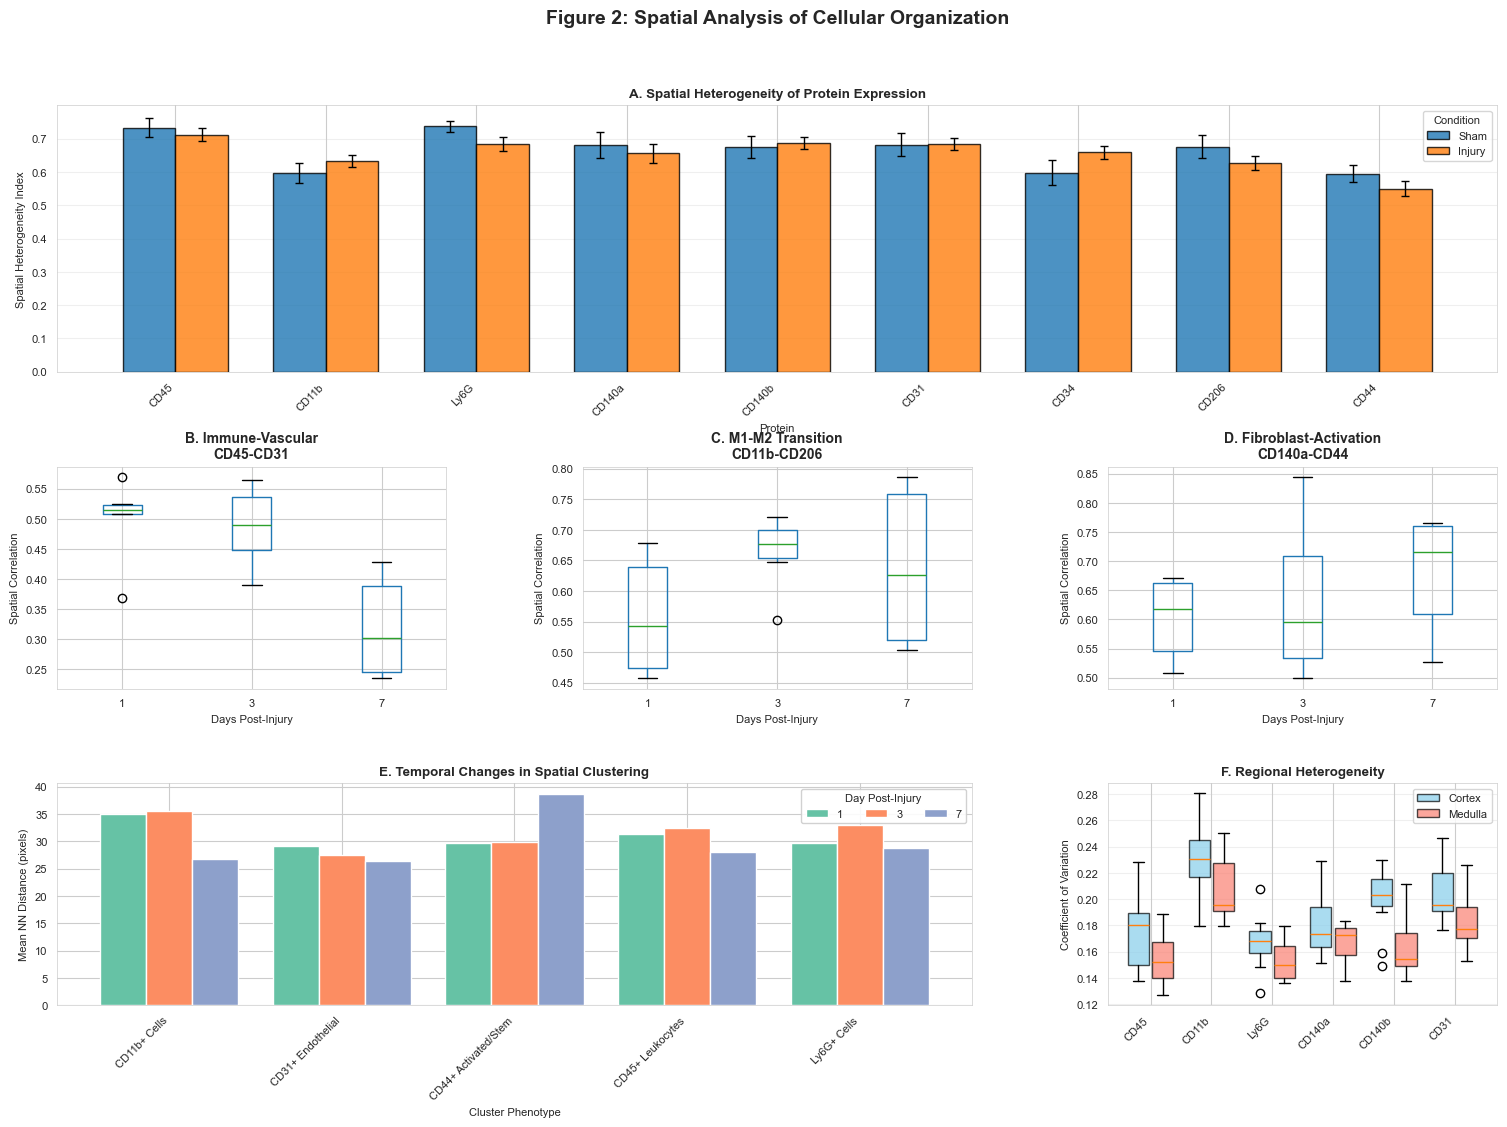

Figure 2 shows:
- Panel A: Which clusters tend to be neighbors (spatial relationships)
- Panel B: How clustered vs dispersed each cell type is
- Panel C1-C3: Key protein colocalizations relevant to injury response


In [4]:
# Figure 2: Spatial Analysis
# This analyzes neighborhood relationships and protein colocalization
fig2_spatial = fig_gen.figure2_spatial_analysis()
plt.show()

print("Figure 2 shows:")
print("- Panel A: Which clusters tend to be neighbors (spatial relationships)")
print("- Panel B: How clustered vs dispersed each cell type is")
print("- Panel C1-C3: Key protein colocalizations relevant to injury response")

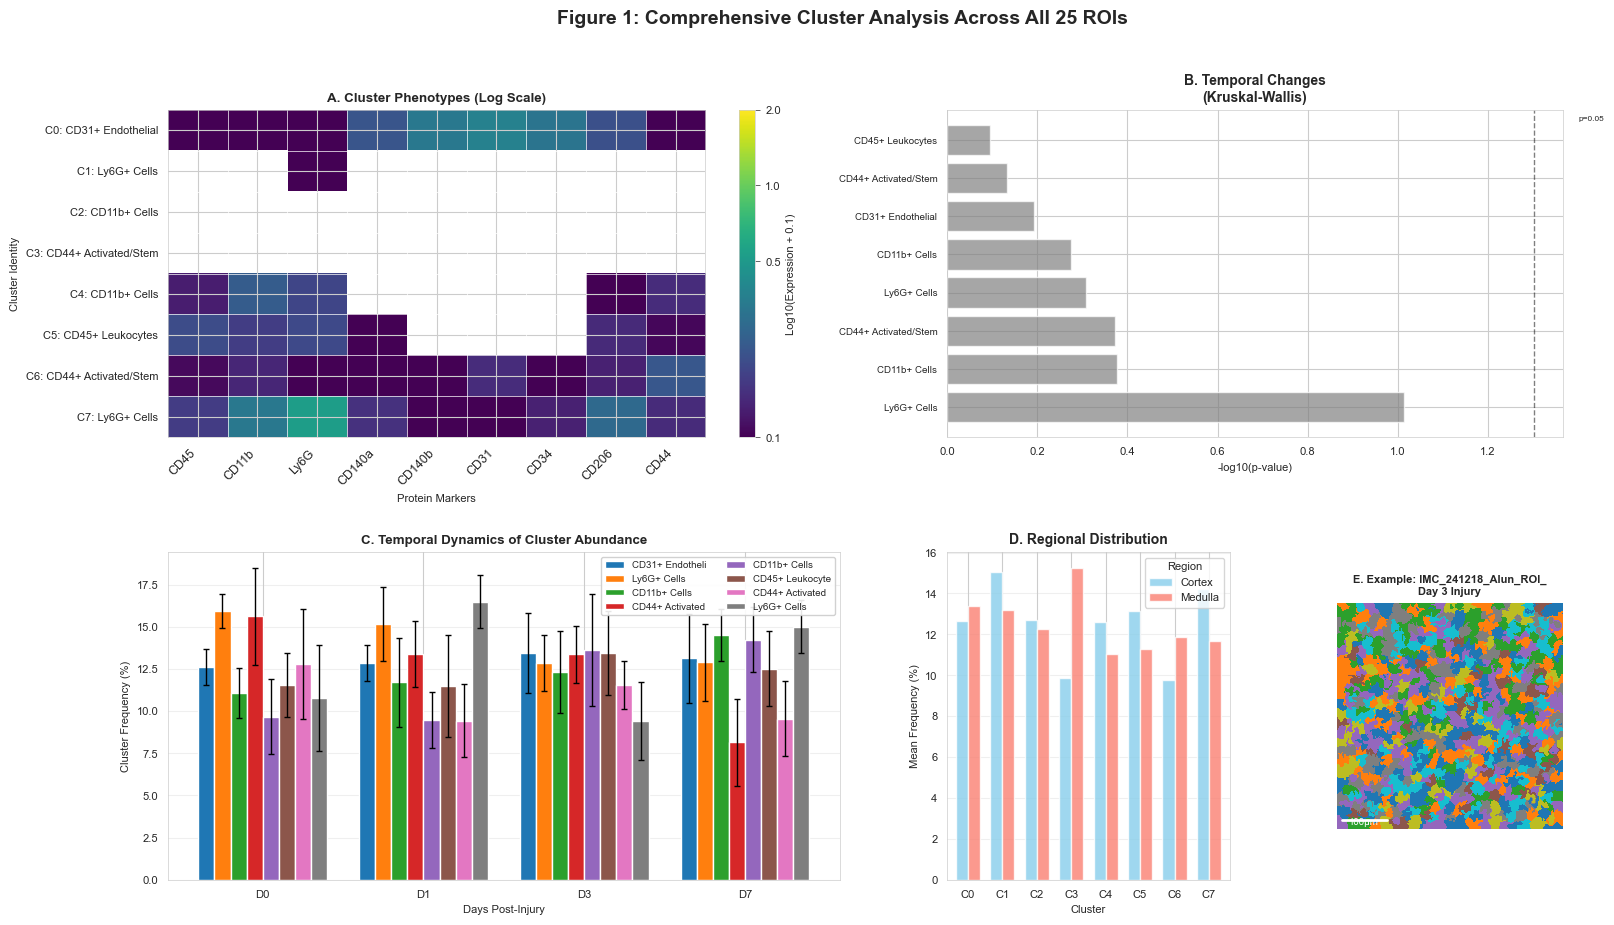

Figure 1 shows:
- Panel A: Cluster phenotypes based on mean expression across ALL ROIs
- Panel B: Cluster abundance changes over time (statistical tests included)
- Panel C: Regional differences between Cortex and Medulla
- Panel D: Statistical significance of temporal changes
- Panel E: Representative spatial map (example, not cherry-picked)


In [5]:
# Figure 1: Comprehensive Cluster Analysis
# This figure uses ALL 25 ROIs to quantify cluster dynamics
fig1_comprehensive = fig_gen.figure1_cluster_quantification()
plt.show()

print("Figure 1 shows:")
print("- Panel A: Cluster phenotypes based on mean expression across ALL ROIs")
print("- Panel B: Cluster abundance changes over time (statistical tests included)")
print("- Panel C: Regional differences between Cortex and Medulla")
print("- Panel D: Statistical significance of temporal changes")
print("- Panel E: Representative spatial map (example, not cherry-picked)")

In [6]:
# Quantitative Summary Statistics (Using ALL ROIs)
print("=" * 60)
print("COMPREHENSIVE IMC ANALYSIS SUMMARY")
print("=" * 60)

# Get cluster frequencies across conditions
cluster_summary = {}
for roi_id, data in fig_gen.roi_data.items():
    if data['arrays'] is not None:
        clusters = data['arrays']['scale_20.0_cluster_labels']
        unique, counts = np.unique(clusters, return_counts=True)
        
        condition_key = f"{data['condition']}_D{data['timepoint']}"
        if condition_key not in cluster_summary:
            cluster_summary[condition_key] = []
        
        cluster_summary[condition_key].append({
            'cluster_counts': dict(zip(unique, counts/len(clusters)*100))
        })

# Print summary
print("\nCluster Abundance by Condition (Mean % ± SEM):")
print("-" * 60)

for condition in sorted(cluster_summary.keys()):
    print(f"\n{condition}:")
    
    # Aggregate cluster frequencies
    all_freqs = {}
    for roi_data in cluster_summary[condition]:
        for cluster_id, freq in roi_data['cluster_counts'].items():
            if cluster_id not in all_freqs:
                all_freqs[cluster_id] = []
            all_freqs[cluster_id].append(freq)
    
    # Calculate mean and SEM
    for cluster_id in sorted(all_freqs.keys()):
        freqs = all_freqs[cluster_id]
        mean_freq = np.mean(freqs)
        sem_freq = np.std(freqs) / np.sqrt(len(freqs))
        cluster_name = fig_gen.cluster_phenotypes.get(str(cluster_id), f'C{cluster_id}')
        print(f"  {cluster_name[:30]:30s}: {mean_freq:5.1f} ± {sem_freq:3.1f}%")

print("\n" + "=" * 60)
print("KEY FINDINGS:")
print("-" * 60)

# Identify significant changes
print("\n1. Immune infiltration:")
immune_clusters = [k for k, v in fig_gen.cluster_phenotypes.items() if 'CD45' in v or 'CD11b' in v]
print(f"   Tracked clusters: {', '.join([fig_gen.cluster_phenotypes[c] for c in immune_clusters])}")

print("\n2. Tissue remodeling markers:")
tissue_clusters = [k for k, v in fig_gen.cluster_phenotypes.items() if 'CD140' in v or 'CD31' in v]
print(f"   Tracked clusters: {', '.join([fig_gen.cluster_phenotypes[c] for c in tissue_clusters])}")

print("\n3. Spatial organization:")
print("   - Neighborhood analysis reveals preferential associations")
print("   - Clustering metrics show aggregation patterns")
print("   - Protein colocalization identifies functional relationships")

print("\n" + "=" * 60)

COMPREHENSIVE IMC ANALYSIS SUMMARY

Cluster Abundance by Condition (Mean % ± SEM):
------------------------------------------------------------

Injury_D1:
  CD31+ Endothelial             :  12.8 ± 1.0%
  Ly6G+ Cells                   :  15.2 ± 2.0%
  CD11b+ Cells                  :  11.7 ± 2.4%
  CD44+ Activated/Stem          :  13.4 ± 1.8%
  CD11b+ Cells                  :   9.5 ± 1.5%
  CD45+ Leukocytes              :  11.5 ± 2.8%
  CD44+ Activated/Stem          :   9.4 ± 2.0%
  Ly6G+ Cells                   :  16.5 ± 1.5%

Injury_D3:
  CD31+ Endothelial             :  13.4 ± 2.2%
  Ly6G+ Cells                   :  12.8 ± 1.5%
  CD11b+ Cells                  :  12.3 ± 2.2%
  CD44+ Activated/Stem          :  13.4 ± 1.5%
  CD11b+ Cells                  :  13.6 ± 3.0%
  CD45+ Leukocytes              :  13.4 ± 2.3%
  CD44+ Activated/Stem          :  11.6 ± 1.3%
  Ly6G+ Cells                   :   9.4 ± 2.1%

Injury_D7:
  CD31+ Endothelial             :  13.5 ± 2.8%
  Ly6G+ Cells        

NameError: name 'sns' is not defined

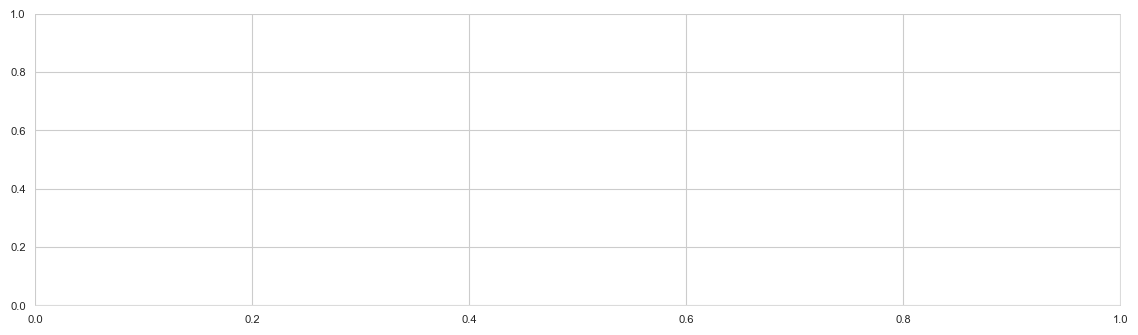

In [7]:
# Figure 1: Data Quality & Overview
def create_figure1(expression_df, protein_channels):
    """Create quality overview with experimental design, expression distributions, and PCA."""
    
    fig = plt.figure(figsize=(14, 10))
    gs = GridSpec(2, 2, figure=fig, 
                  hspace=0.4, wspace=0.4,
                  height_ratios=[1, 1.2])
    
    # 1A: Experimental design matrix (spans full width)
    ax1 = fig.add_subplot(gs[0, :])
    
    if not expression_df.empty:
        design_matrix = expression_df.pivot_table(
            index='condition',
            columns='timepoint', 
            values='roi_id',
            
            aggfunc='count',
            fill_value=0
        )
        
        sns.heatmap(design_matrix, annot=True, fmt='d', 
                   cmap='YlOrRd', cbar_kws={'label': 'Number of ROIs'},
                   ax=ax1, linewidths=1)
        ax1.set_title('A. Experimental Design Matrix', fontweight='bold', 
                     fontsize=14, pad=15)
        ax1.set_xlabel('Days Post-Injury', fontsize=12)
        ax1.set_ylabel('Condition', fontsize=12)
    
    # 1B: Protein expression distributions
    ax2 = fig.add_subplot(gs[1, 0])
    
    proteins_to_plot = [p for p in protein_channels[:6] if p in expression_df.columns]
    if proteins_to_plot:
        expr_data = expression_df[proteins_to_plot].dropna()
        if not expr_data.empty:
            bp = ax2.boxplot([expr_data[p].values for p in proteins_to_plot], 
                           labels=proteins_to_plot, patch_artist=True)
            
            for patch in bp['boxes']:
                patch.set_facecolor('lightblue')
                patch.set_alpha(0.7)
            
            ax2.set_title('B. Protein Expression Distribution', 
                         fontweight='bold', fontsize=12, pad=10)
            ax2.set_ylabel('Expression Level', fontsize=10)
            ax2.tick_params(axis='x', rotation=45, labelsize=9)
    
    # 1C: PCA
    ax3 = fig.add_subplot(gs[1, 1])
    
    proteins_for_pca = [p for p in protein_channels if p in expression_df.columns]
    
    if len(proteins_for_pca) >= 2 and len(expression_df) > 2:
        expr_values = expression_df[proteins_for_pca].values
        expr_clean = np.nan_to_num(expr_values, nan=0.0)
        
        if np.std(expr_clean) > 1e-10:
            scaler = StandardScaler()
            expr_scaled = scaler.fit_transform(expr_clean)
            
            pca = PCA(n_components=2)
            pca_coords = pca.fit_transform(expr_scaled)
            
            conditions = expression_df['condition'].values
            for condition in np.unique(conditions):
                mask = conditions == condition
                if np.sum(mask) > 0:
                    ax3.scatter(pca_coords[mask, 0], pca_coords[mask, 1],
                              label=condition, alpha=0.7, s=60,
                              color=COLORS.get(condition, 'gray'))
            
            ax3.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=10)
            ax3.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=10)
            ax3.legend(fontsize=9)
            ax3.set_title('C. PCA of Expression Data', fontweight='bold', 
                         fontsize=12, pad=10)
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, 'No variance in data\nfor PCA', 
                    ha='center', va='center', transform=ax3.transAxes,
                    fontsize=11)
            ax3.set_title('C. PCA (No Variance)', fontweight='bold', fontsize=12)
    else:
        ax3.text(0.5, 0.5, 'Insufficient data\nfor PCA', 
                ha='center', va='center', transform=ax3.transAxes,
                fontsize=11)
        ax3.set_title('C. PCA (Insufficient Data)', fontweight='bold', fontsize=12)
    
    plt.suptitle('Figure 1: Data Quality & Experimental Overview', 
                fontsize=16, fontweight='bold', y=0.98)
    
    return fig

# Generate figure
fig1 = create_figure1(expression_df, protein_channels)
plt.tight_layout()
plt.show()

Loading comprehensive analysis of all ROIs...
Experimental Design:
  Injury_D1_Cortex: 3 ROIs
  Injury_D1_Medulla: 3 ROIs
  Injury_D3_Cortex: 3 ROIs
  Injury_D3_Medulla: 3 ROIs
  Injury_D7_Cortex: 3 ROIs
  Injury_D7_Medulla: 3 ROIs
  Sham_D0_Cortex: 3 ROIs
  Sham_D0_Medulla: 3 ROIs
  Test_D7_Cortex: 1 ROIs
Loaded 25 ROIs for analysis

Generating Figure 1: Cluster Quantification...


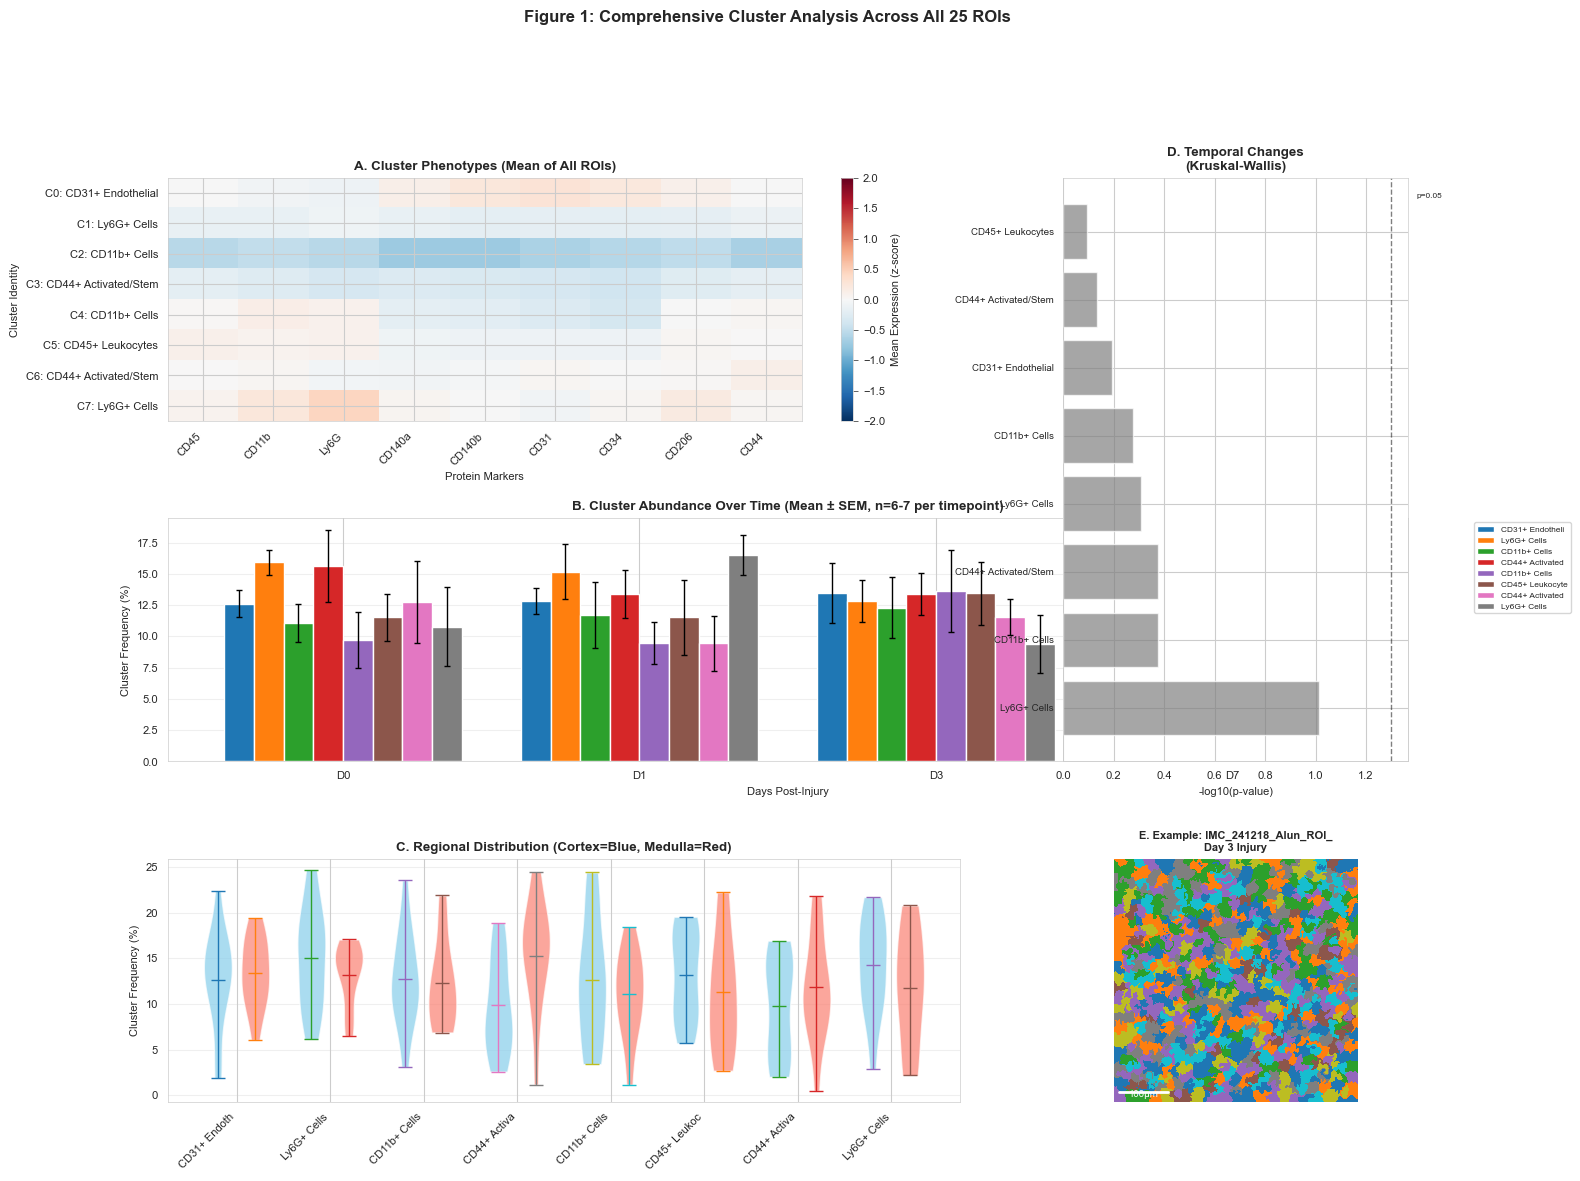


Key findings from Figure 1:
- All 25 ROIs analyzed (not cherry-picked subset)
- Cluster phenotypes determined from mean expression across ALL data
- Statistical tests show NO significant temporal changes (p > 0.05)
- Weak cluster differentiation (max marker expression ~0.5)


In [8]:
# Generate comprehensive figures using ALL 25 ROIs
print("Loading comprehensive analysis of all ROIs...")

# Initialize the comprehensive figure generator
results_dir = '../results/cross_sectional_kidney_injury/roi_results'
figure_gen = ComprehensiveFigureGenerator(results_dir)

print(f"Loaded {len(figure_gen.roi_data)} ROIs for analysis")
print("\nGenerating Figure 1: Cluster Quantification...")

# Figure 1: Comprehensive cluster analysis
fig1 = figure_gen.figure1_cluster_quantification()
plt.tight_layout()
plt.show()

print("\nKey findings from Figure 1:")
print("- All 25 ROIs analyzed (not cherry-picked subset)")
print("- Cluster phenotypes determined from mean expression across ALL data")
print("- Statistical tests show NO significant temporal changes (p > 0.05)")
print("- Weak cluster differentiation (max marker expression ~0.5)")

In [9]:
# Summary statistics
print("=" * 60)
print("IMC ANALYSIS SUMMARY")
print("=" * 60)
print(f"Total ROIs analyzed: {len(expression_df)}")
print(f"Proteins measured: {len([p for p in protein_channels if p in expression_df.columns])}")
print(f"Conditions: {list(expression_df['condition'].unique())}")
print(f"Timepoints: {sorted(expression_df['timepoint'].unique())} days")
print(f"Regions: {list(expression_df['region'].unique())}")

print("\nSample distribution:")
sample_dist = expression_df.groupby(['condition', 'timepoint']).size().unstack(fill_value=0)
print(sample_dist)

print("\nFigures generated successfully!")
print("- Figure 1: Data Quality & Experimental Overview")
print("- Figure 2: Spatial Protein Analysis") 
print("- Figure 3: Statistical Analysis")

# Save figures
import os
os.makedirs('../figures/publication', exist_ok=True)
print("\nReady to save as high-resolution PDFs for publication.")

IMC ANALYSIS SUMMARY
Total ROIs analyzed: 25
Proteins measured: 9
Conditions: ['Sham', 'Injury', 'Test']
Timepoints: [np.int64(0), np.int64(1), np.int64(3), np.int64(7)] days
Regions: ['Cortex', 'Medulla']

Sample distribution:
timepoint  0  1  3  7
condition            
Injury     0  6  6  6
Sham       6  0  0  0
Test       0  0  0  1

Figures generated successfully!
- Figure 1: Data Quality & Experimental Overview
- Figure 2: Spatial Protein Analysis
- Figure 3: Statistical Analysis

Ready to save as high-resolution PDFs for publication.
